In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Iris Data

<img src="https://gadictos.com/wp-content/uploads/2019/03/iris-machinelearning-1060x397.png">

<br><div style="text-align: right">Image Source: <a href="https://gadictos.com/iris-data-classification-using-neural-net/">https://gadictos.com/iris-data-classification-using-neural-net/</a></div>

##### Table Representation of Iris Data

In [2]:
pd.read_csv('iris.csv').iloc[:, 1:]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##### Load Iris Data from sklearn Library

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

# 1. Cross Validation for Model Selection

##### Split Data Using Traditional Method (70% for training, 30% for testing)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

##### Logistic Regression Classifier

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9333333333333333

##### Support Vector Machine Classifier

In [6]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9555555555555556

##### Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8888888888888888

##### K-Nearest Neighbors Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9555555555555556

##### Split Dataset Using K-Fold Cross Validation Method

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">

<br><div style="text-align: right">Image Source: <a href="https://scikit-learn.org/stable/modules/cross_validation.html">https://scikit-learn.org/stable/modules/cross_validation.html</a></div>

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [10]:
for train_index, test_index in kf.split(np.arange(10)):
    print(train_index, test_index)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [11]:
for train_index, test_index in kf.split(np.arange(8)):
    print(train_index, test_index)

[2 3 4 5 6 7] [0 1]
[0 1 4 5 6 7] [2 3]
[0 1 2 3 6 7] [4 5]
[0 1 2 3 4 5 7] [6]
[0 1 2 3 4 5 6] [7]


In [12]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return(model.score(X_test, y_test))

##### Model Comparison (K-Fold = 5)

In [13]:
scores_lr = []
scores_svm = []
scores_rf = []
scores_knn = []

for train_index, test_index in kf.split(iris.data):
    X_train, X_test, y_train, y_test = iris.data[train_index], iris.data[test_index], iris.target[train_index], iris.target[test_index]
    
    scores_lr.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    scores_knn.append(get_score(KNeighborsClassifier(), X_train, X_test, y_train, y_test))

In [14]:
print('''Average Classification Score
------------------------------
Logistic Regression: %.2f%%
Support Vector Machine: %.2f%%
Random Forest: %.2f%%
K-Nearest Neighbors: %.2f%%''' % (np.mean(scores_lr) * 100, np.mean(scores_svm) * 100, np.mean(scores_rf) * 100, np.mean(scores_knn) * 100))

Average Classification Score
------------------------------
Logistic Regression: 92.67%
Support Vector Machine: 89.33%
Random Forest: 90.67%
K-Nearest Neighbors: 91.33%


# 2. Cross Validation for Model Parameter Selction

In [15]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9736842105263158

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

scores_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores_knn

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

### 2.1 Performance Metric - Accuracy

Accuracy is a useful metric while evaluating the cross validation performance for classification problem. Accuracy is the ratio of correctly predicted entris to the total number of predictions:

\begin{equation*}
Accuracy=\frac{Number\ of\ Correct\ Predictions}{Total\ Number\ of\ Predictions}
\end{equation*}

### 2.2 Performance Metric - Loss

Loss is a concept widely used to represent performance of cross validation. Functions defining Loss may vary based on whether the variable is discrete or continuous.

Logarithmic Loss is a commonly used metric that penalize false classification or mispredictions. The classifier is defined by a general form as

$$Loss=\frac{-1}{N}\sum_{i=1}^{N}\sum_{j=1}^{M}y_{ij}\cdot log(p_{ij})$$

where $y_{ij}$ indicates whether sample $i$ belongs to class $j$ or not and $p_{ij}$ indicates the probability of sample $i$ belonging to class $j$

Sometimes when the model involves continuous variables (i.e. regression analysis), cross validation performance can be represented using Mean Squared Error (MSE), which is also a type of loss. In general, MSE can be defined as the sum of the squared subtraction between every pair of targe $y$ variable and its prediction

$$MSE=\frac{\sum_{i=1}^{n}(y_{i}-\hat y_{i})^2}{n}$$

where iterator $i$ denotes the $i$ th entry among the entire sample whose size is equal to $n$.

In [17]:
k_range = range(1, 40)
k_accuracy = []
k_mse = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    loss = -cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    k_accuracy.append(np.mean(accuracy))
    k_mse.append(np.mean(loss))

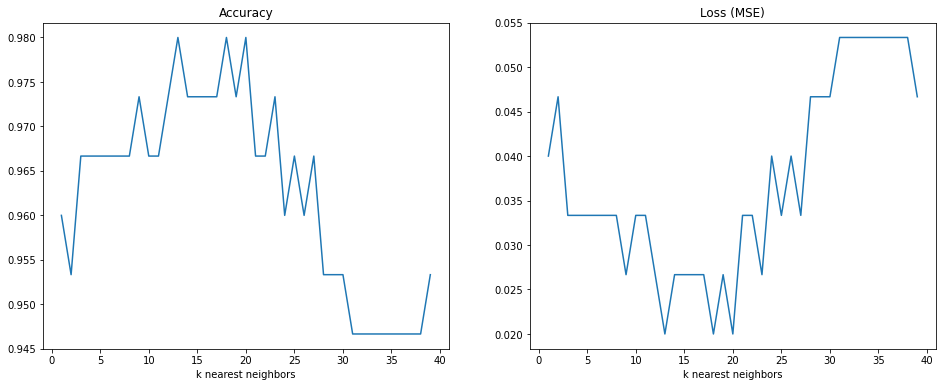

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].plot(k_range, k_accuracy)
ax[0].set_xlabel('k nearest neighbors')
ax[0].set_title('Accuracy')

ax[1].plot(k_range, k_mse)
ax[1].set_xlabel('k nearest neighbors')
ax[1].set_title('Loss (MSE)')

plt.show()